# Conv Net classifier, MNIST Dataset

### New concepts:
•Convolution net

•Batch normalization, Max pooling

•Cross entropy loss

•Adam optimization algorithm

In [2]:
import torch 
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from random import randint
from matplotlib import pyplot as plt

In [6]:
num_epochs = 5
num_classes = 10
batch_size = 100
learning_rate = 0.001

In [7]:
#dataset for training (download = True to download the dataset for the first time)
train_dataset = torchvision.datasets.MNIST('mnist/',train=True,transform=transforms.ToTensor(), download=False)
#loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
#dataset for testing (download = True to download the dataset for the first time)
test_dataset = torchvision.datasets.MNIST('mnist/',train=False,transform=transforms.ToTensor(), download=False)
#loader
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)


### ConvNet class

In [18]:
class ConvNet(nn.Module):
    def __init__(self, num_classes):
        super(ConvNet, self).__init__()
        #Two sequential container layers 
        #first one
        self.layer1 = nn.Sequential(
            #1 tensor as input, 16 outputs (so it has 16 different conv filters)
            nn.Conv2d(1, 16, kernel_size = 5, stride = 1, padding = 2),
            #batch normalization to the 16 outs
            nn.BatchNorm2d(16),
            #ReLU activation
            nn.ReLU(),
            #Max pooling
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        #second one
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size = 5, stride = 1, padding = 2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        #output layer: 32*w*h
        self.output_layer = nn.Linear(7*7*32, num_classes)
        
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        out = self.output_layer(out)
        return out
    

### Instantiating, training and saving a model

In [ ]:
model = ConvNet(10)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)


In [ ]:
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        
        #forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        #backward & optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if (i+1) % 100 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                .format(epoch+1, num_epochs, i+1, total_step, loss.item()))
        
torch.save(model.state_dict(), 'first_conv_net.pkl')       

### Loading a previously trained model

In [19]:
model = ConvNet(10)
model.load_state_dict(torch.load('first_conv_net.pkl'))

#evaluation mode, gradient calculations disabled
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    
    #testing the whole test dataset
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data,1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    print('Test Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))
        

Test Accuracy of the model on the 10000 test images: 99.12 %


### Lets see the convolution filters! from 1st conv layer and 2nd conv layer respectively

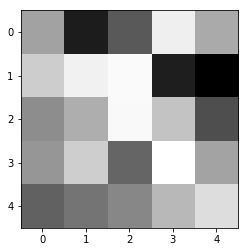

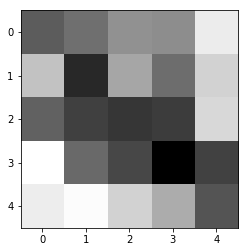

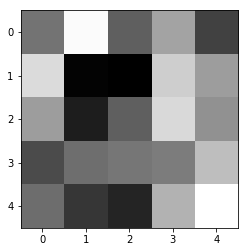

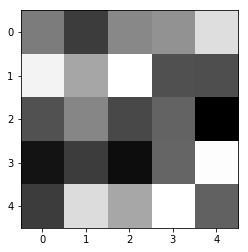

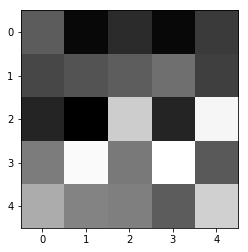

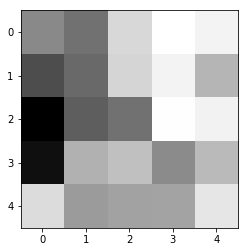

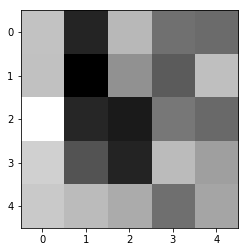

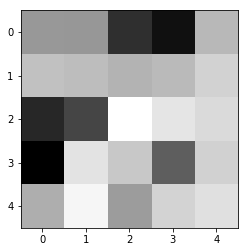

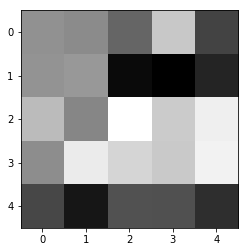

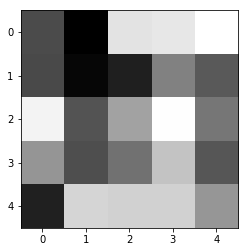

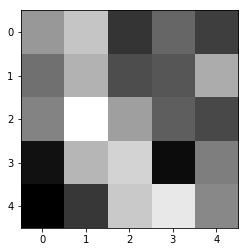

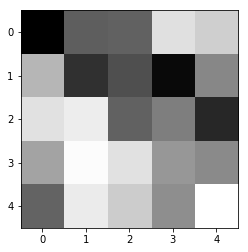

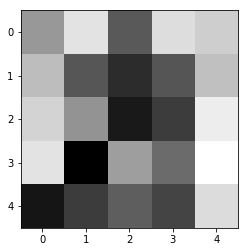

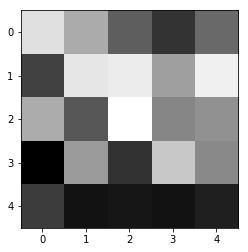

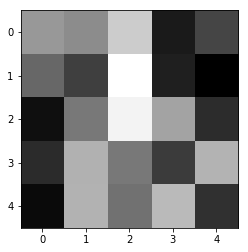

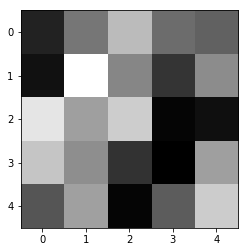

In [53]:
weights_1 = model.layer1[0].weight.data.numpy()
for i in range(weights_1.shape[0]):
    plt.imshow(weights_1[i][0], cmap = 'gray')
    plt.show()

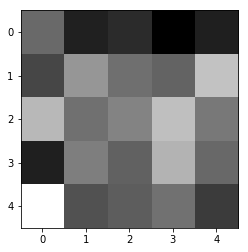

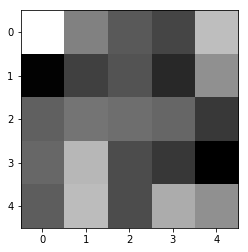

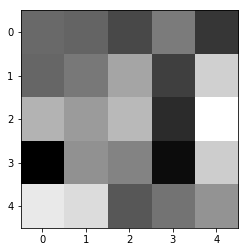

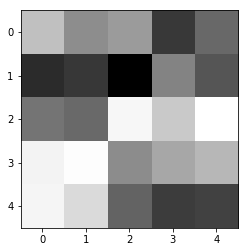

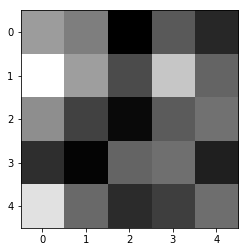

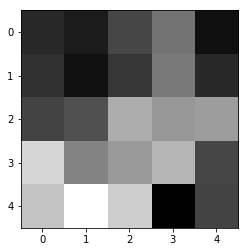

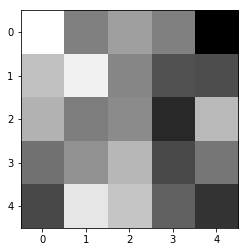

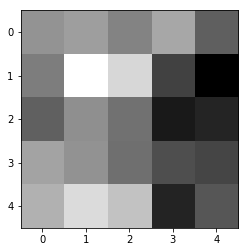

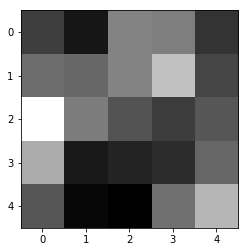

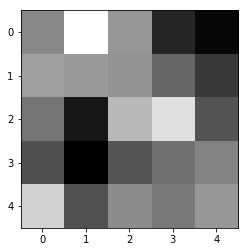

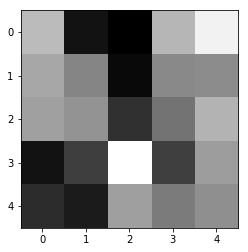

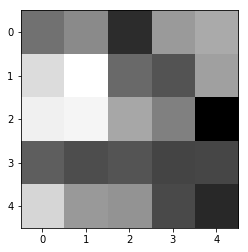

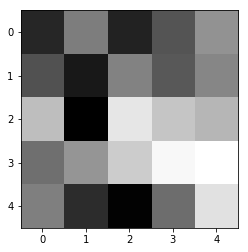

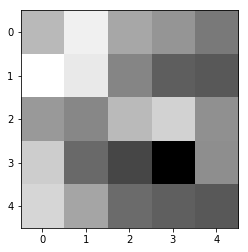

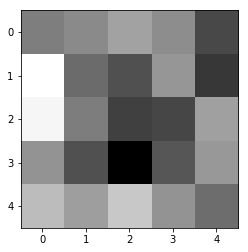

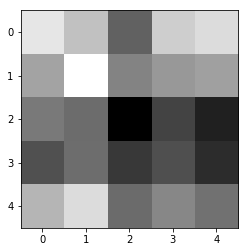

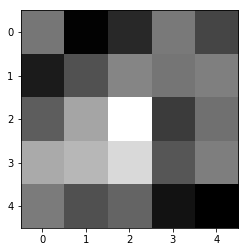

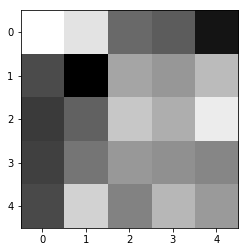

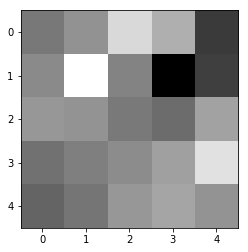

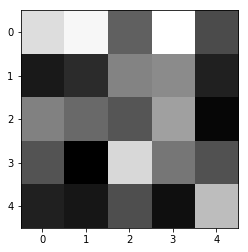

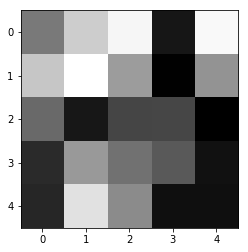

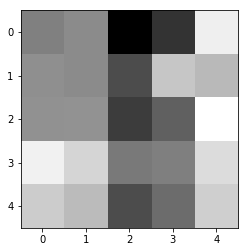

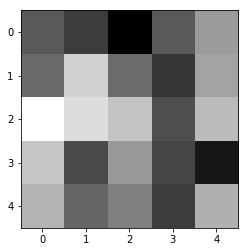

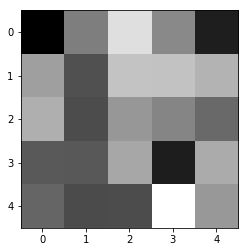

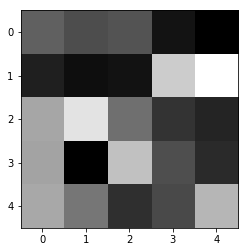

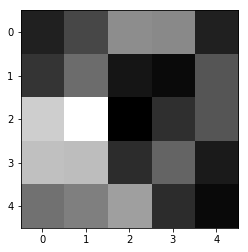

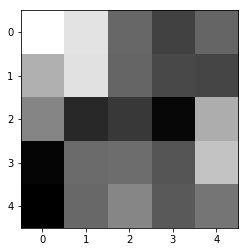

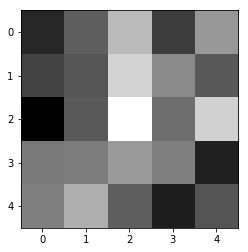

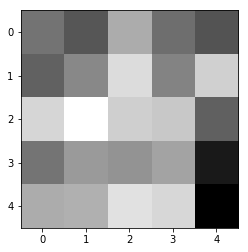

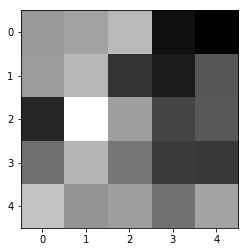

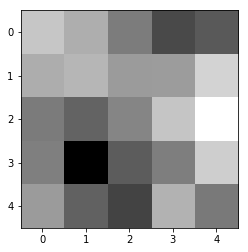

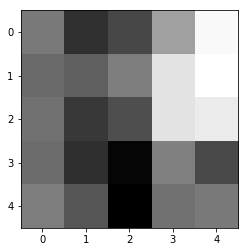

In [54]:
weights_2 = model.layer2[0].weight.data.numpy()
for i in range(weights_2.shape[0]):
    plt.imshow(weights_2[i][0], cmap = 'gray')
    plt.show()

### Lets classify a random image from the test dataset

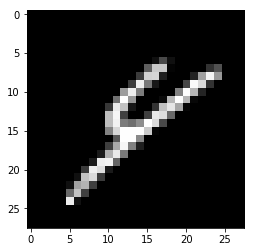

my prediction is 4 and the actual image was a 4


In [20]:
i = randint(0,10000)
img = test_dataset[i][0]
#The model takes batches of images so my single image needs to be included in a batch
#tensor.unsqueeze_() adds a single dimension at the specified position
img.unsqueeze_(0)
out = model(img)
_, predicted = torch.max(out.data, 1)

plt.imshow(img[0][0], cmap = 'gray')
plt.show()

print("my prediction is {} and the actual image was a {}".format(predicted[0], test_dataset[i][1]))
